Probabilistic Supervised Learning - Naive Bayes(Binomial): Create a dataset from the sample given to you(e.g. “Titanic, Play Tennis Probability”, “Shopper Buying Probability” etc.). Perform the necessary pre-processing steps such as encoding. Train the model using Naive Bayes Classifier for Binomial predictions. Give new test data and predict the classification output. Handcode the classification probability and compare with the model output. Analyze and write the inference.


In [1]:
import pandas as pd
import numpy as np 
import seaborn as sb
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("../datasets/titanic.csv")
df.head()


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [3]:
df.drop(columns=['Name'],inplace=True)

In [4]:
df.dropna(axis=1)

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000
883,1,1,female,19.0,0,0,30.0000
884,0,3,female,7.0,1,2,23.4500
885,1,1,male,26.0,0,0,30.0000


In [5]:
#ENCODE ANYTHING WITH TEXT TO A VALUE
df['Sex'] = df['Sex'].map({'male':0,'female':1})

In [6]:
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [10]:
df.drop(columns=['Siblings/Spouses Aboard','Parents/Children Aboard','Fare'],inplace=True)

KeyError: "['Siblings/Spouses Aboard', 'Parents/Children Aboard'] not found in axis"

In [12]:
df.head()
df.drop(columns=['Fare'],inplace=True)

In [13]:
df.head()

,Survived,Pclass,Sex,Age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split 

In [15]:
x = df.drop(columns=['Survived'])

In [16]:
y = df['Survived']

In [17]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=True)

In [18]:
model = GaussianNB()

In [19]:
model.fit(x_train,y_train)

GaussianNB()

In [20]:
y_pred = model.predict(x_test)

In [21]:
model.score(x_test,y_test)

0.7865168539325843

In [22]:
from sklearn import metrics

In [23]:
accuracy_score = metrics.accuracy_score(y_test,y_pred)

In [24]:
f1_score = metrics.f1_score(y_test,y_pred)

In [25]:
f1_score

0.732394366197183

In [26]:
cm = metrics.confusion_matrix(y_test,y_pred)


<Axes: >

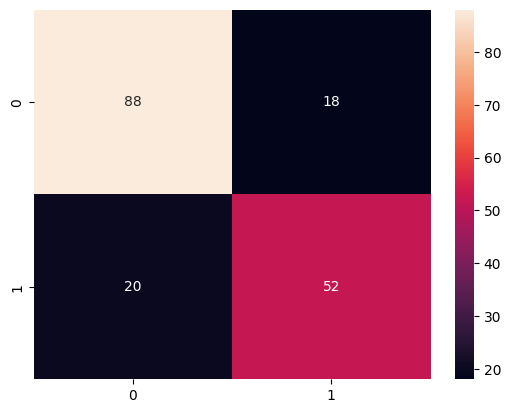

In [28]:
sb.heatmap(cm,annot=True,fmt='g')

In [29]:
prob= model.predict_proba(x_test)
prob

array([[0.92978967, 0.07021033],
       [0.10906359, 0.89093641],
       [0.16026478, 0.83973522],
       [0.11932243, 0.88067757],
       [0.15387715, 0.84612285],
       [0.04108396, 0.95891604],
       [0.64388862, 0.35611138],
       [0.92127729, 0.07872271],
       [0.03165175, 0.96834825],
       [0.21250014, 0.78749986],
       [0.93635055, 0.06364945],
       [0.22943345, 0.77056655],
       [0.82537416, 0.17462584],
       [0.91105389, 0.08894611],
       [0.23491581, 0.76508419],
       [0.91176511, 0.08823489],
       [0.02992049, 0.97007951],
       [0.0902714 , 0.9097286 ],
       [0.0381361 , 0.9618639 ],
       [0.60128647, 0.39871353],
       [0.92127729, 0.07872271],
       [0.22386358, 0.77613642],
       [0.03107186, 0.96892814],
       [0.9081036 , 0.0918964 ],
       [0.91646426, 0.08353574],
       [0.13584815, 0.86415185],
       [0.14513133, 0.85486867],
       [0.90334568, 0.09665432],
       [0.20090529, 0.79909471],
       [0.22665885, 0.77334115],
       [0.

In [30]:
prob = prob[:,1]

In [31]:
fpr,tpr,_=metrics.roc_curve(y_test,prob)

<Axes: >

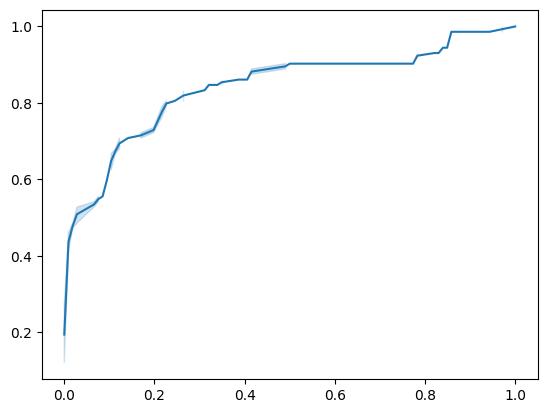

In [32]:
sb.lineplot(x=fpr,y=tpr)